# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [67]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [68]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

First gather answers for these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [69]:
data.shape   # it shows 5391 rows and 6 columns

(5391, 6)

In [70]:
data.isna().values.any()    #It shows no NAN value

np.False_

In [71]:
data.duplicated()    #It shows no duplicate value

0       False
1       False
2       False
3       False
4       False
        ...  
5386    False
5387    False
5388    False
5389    False
5390    False
Length: 5391, dtype: bool

In [72]:
data.info()  #It shows the type as dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.


In [73]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])
data.head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


Convert the `Release_Date` column to a Pandas Datetime type.

In [75]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics



1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [76]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


The average film costs about 31 million to make and makes around 3x that (or ~$89 million) in worldwide revenue. So that's encouraging.

But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is 5 million and they only bring in 3.8 million in worldwide revenue!

The minimum domestic and worldwide revenue is $0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

On the other hand, the highest production budget was 425,000,000 and the highest worldwide revenue was 2,783,918,982. 2.7 Billion revenue!

In [77]:
data[data.USD_Production_Budget == 1100]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [78]:
data[data.USD_Production_Budget == 425000000]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


# Investigating the Zero Revenue Films

How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [79]:
data[data.USD_Worldwide_Gross == 0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [80]:
data[data.USD_Domestic_Gross == 0]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
1,5140,1916-05-09,Intolerance,385907,0,0
6,4630,1927-12-08,Wings,2000000,0,0
8,4240,1930-01-01,Hell's Angels,4000000,0,0
17,4814,1936-10-20,"Charge of the Light Brigade, The",1200000,0,0
27,4789,1941-10-28,How Green Was My Valley,1250000,0,0
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


### Filtering on Multiple Conditions

In [81]:
international_releases = data.loc[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]
f"Number of International Releases: {len(international_releases)}."

'Number of International Releases: 155.'

Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.


In [82]:
international_release = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross == 0')
f"Number of International Releases: {len(international_release)}."

'Number of International Releases: 155.'

### Unreleased Films

* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [83]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [84]:
future_releases = data[data.Release_Date >= scrape_date]
data_clean = data.drop(future_releases.index)
data_clean.shape

(5384, 6)

### Films that Lost Money


What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [85]:
money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]

In [86]:
(len(money_losing)/len(data_clean))*100

37.27711738484398

# Seaborn for Data Viz: Bubble Charts

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

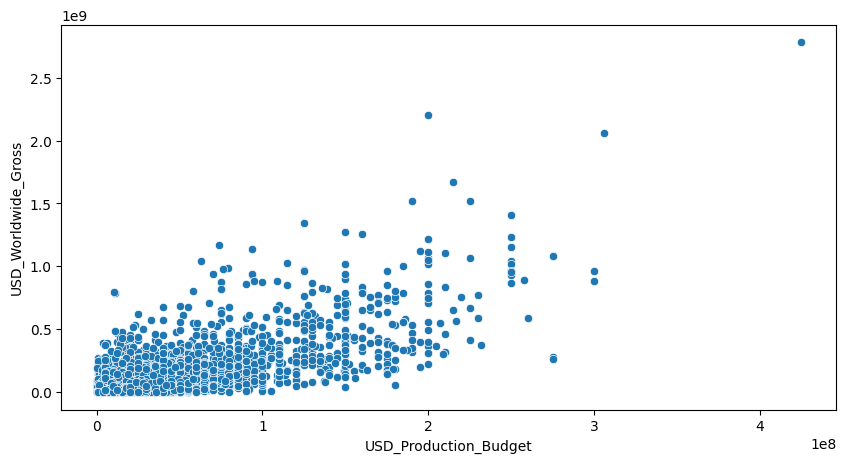

In [87]:
plt.figure(figsize = (10,5), dpi = 100)
sns.scatterplot(data_clean, x = 'USD_Production_Budget',y= 'USD_Worldwide_Gross')

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

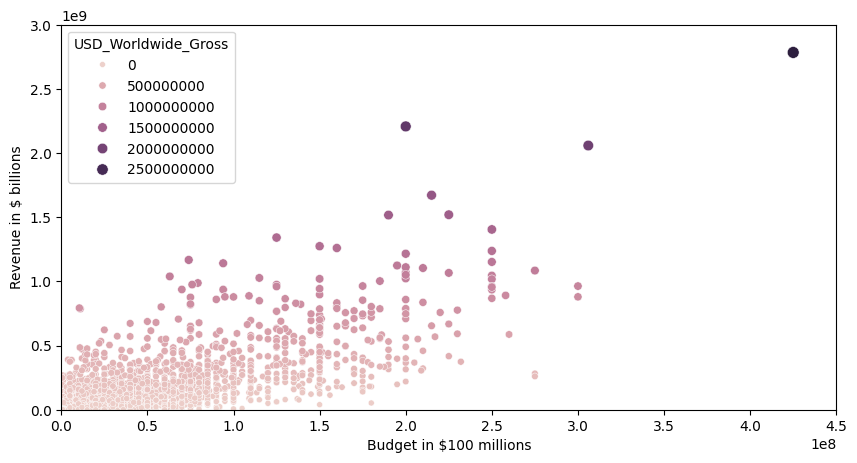

In [88]:
plt.figure(figsize = (10,5), dpi = 100)
ax = sns.scatterplot(data_clean, x = 'USD_Production_Budget',y= 'USD_Worldwide_Gross',hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
ax.set(ylim = (0,3000000000),
       xlim= (0,450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

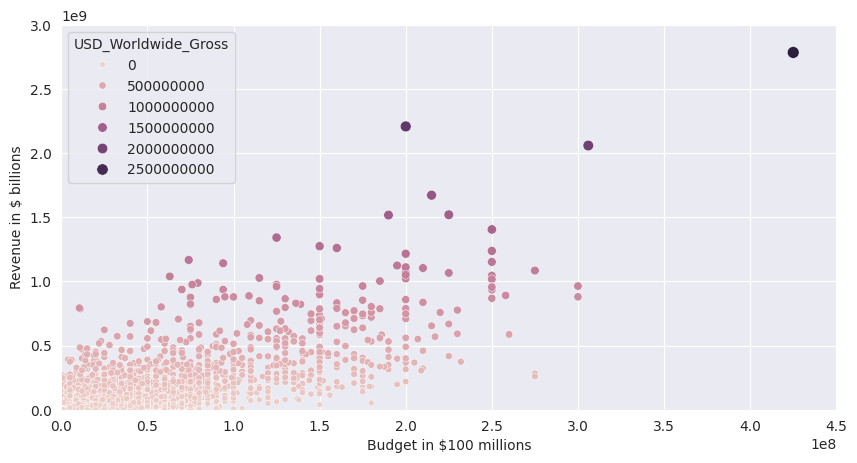

In [89]:
plt.figure(figsize = (10,5), dpi = 100)

with sns.axes_style('darkgrid'):

    ax = sns.scatterplot(data_clean, x = 'USD_Production_Budget',y= 'USD_Worldwide_Gross',hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
ax.set(ylim = (0,3000000000),
       xlim= (0,450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

### Plotting Movie Releases over Time

ry to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



[(0.0, 450000000.0),
 (np.float64(-19876.0), np.float64(17531.0)),
 Text(0, 0.5, 'Budget in $100 millions'),
 Text(0.5, 0, 'Year')]

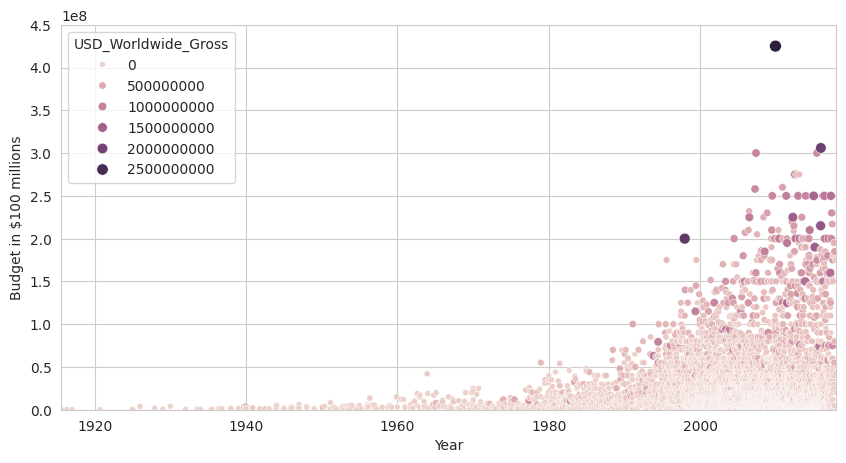

In [90]:
plt.figure(figsize = (10,5), dpi = 100)

with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data_clean, x = 'Release_Date',y= 'USD_Production_Budget',hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
ax.set(ylim = (0,450000000),
       xlim= (data_clean.Release_Date.min(), data_clean.Release_Date.max()),
       ylabel='Budget in $100 millions',
       xlabel='Year')

# Converting Years to Decades Trick

Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a DatetimeIndex Object from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [95]:
dt_index = pd.DatetimeIndex(data_clean.Release_Date)
years = dt_index.year
decades = years//10*10
data_clean['Decade'] = decades
data_clean.columns

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross', 'Decade'],
      dtype='object')

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [103]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]
f"Films released prior to 1970: {len(old_films)}"
old_films.sort_values('USD_Production_Budget', ascending=False).head(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


The most expensive film prior to 1970 was Cleopatra, with a production budget of $42 million.

# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

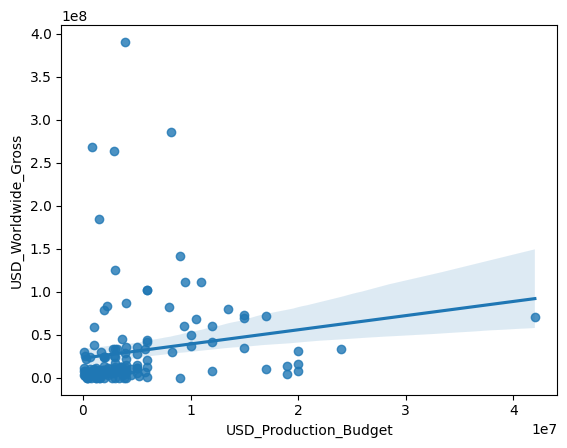

In [104]:
sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

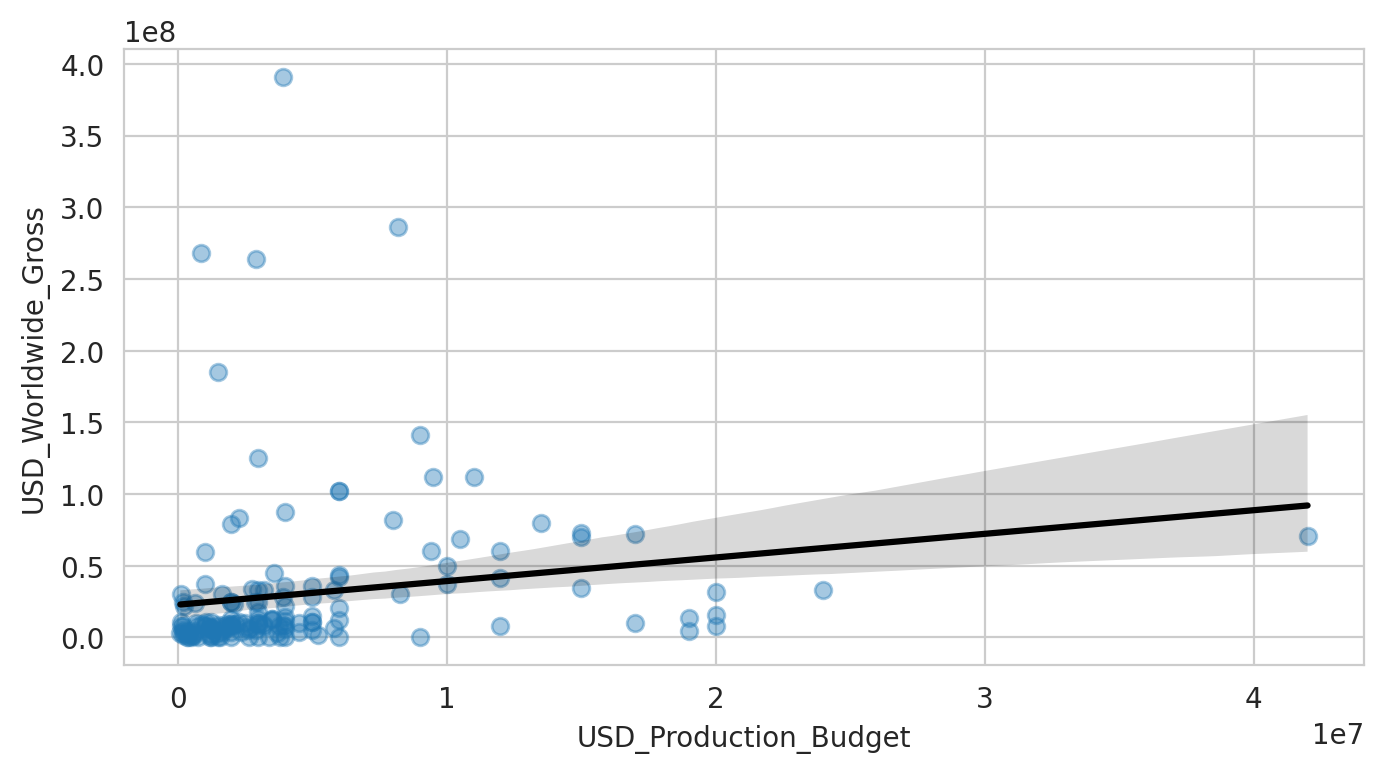

In [118]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
plt.show()

Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

[(0.0, 3000000000.0),
 (0.0, 450000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 Text(0.5, 0, 'Budget in $100 millions')]

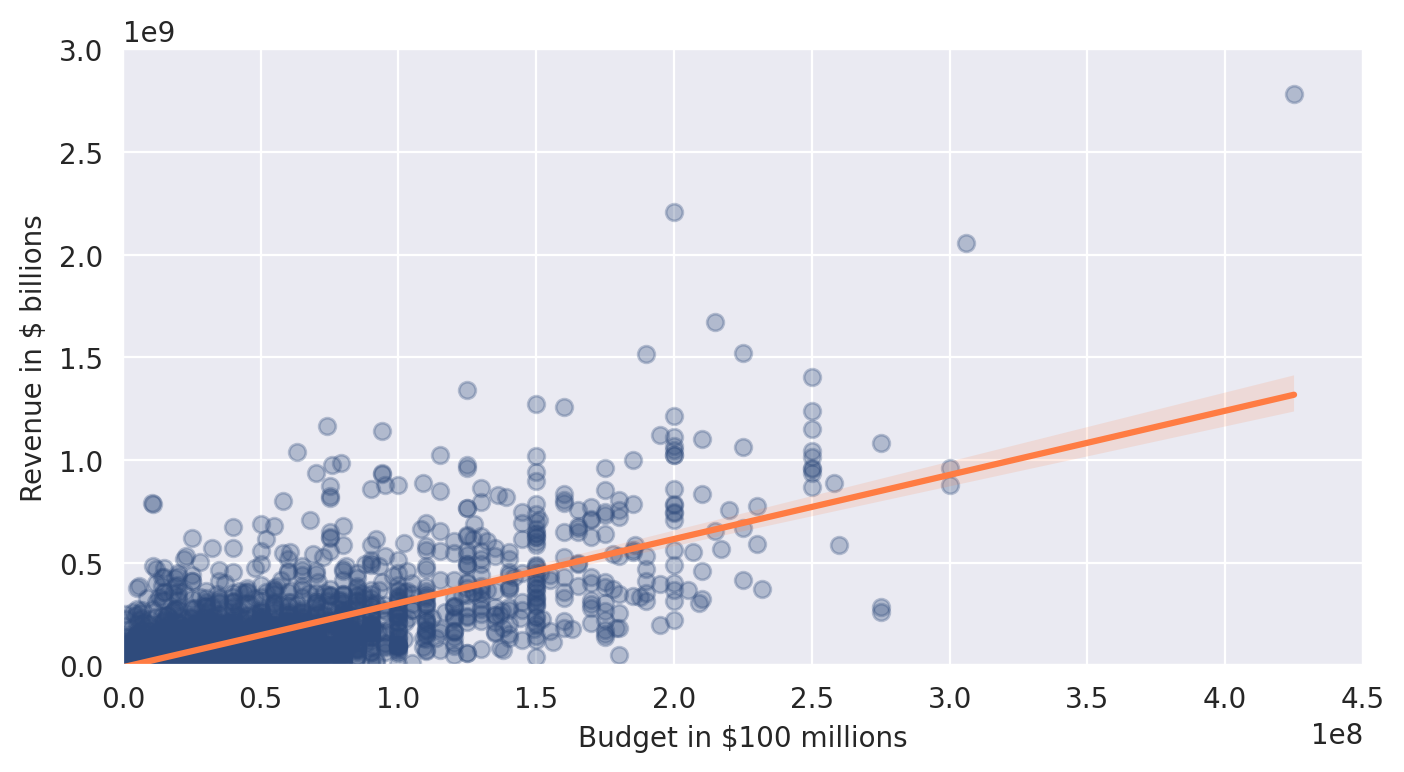

In [123]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(data=new_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': '#ff7c43'})
ax.set(ylim = (0,3000000000),
       xlim= (0,450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')


This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a $150 million budget is predicted to make slightly under $500 million by our regression line.
All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

# Run Regression with scikit-learn
But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.
$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [128]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

regression.fit(X,y)
#regression.coef_
regression.intercept_


array([-8650768.00661042])

if a movie budget is 0 dollars, the estimated movie revenue is -8.65 million dollars. Hmm... so this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra 1 dollar in the budget, movie revenue increases by 3.1 dollar. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

In [129]:
regression.score(X,y)

0.5577032617720403

Our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [132]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y= pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X,y)
print(f'The slope coefficient is: {regression.coef_}')
print(f'The intercept is: {regression.intercept_}')
print(f'The r-squared is: {regression.score(X, y)}')

The slope coefficient is: [[1.64771314]]
The intercept is: [22821538.63508039]
The r-squared is: 0.02937258620576877


Bad solution as the r-squared is .029. This makes sense considering how poorly our data points aligned with our line earlier.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

How much global revenue does our model estimate for a film with a budget of $350 million?

In [136]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate}.')

The estimated revenue for a $350 film is around $599521139.0388364.
